## Extrablatt

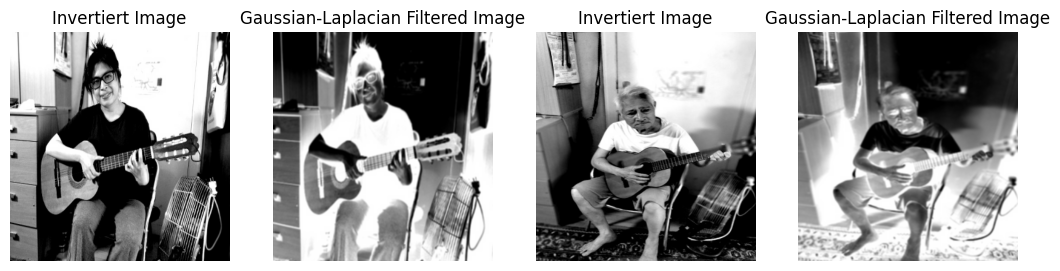

In [41]:
import numpy as np
import skimage.io
import skimage.filters
import scipy.ndimage
import matplotlib.pyplot as plt
from skimage.transform import resize

# Aufgabe 3.2
laplace_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
gaussian_sigma = 2

combined_filter = skimage.filters.gaussian(laplace_kernel, sigma=gaussian_sigma)

# Convert the combined_filter to a 3D kernel
combined_filter_3d = np.stack([combined_filter] * 3, axis=2)

def finishedPic(image):
    resized_image = resize(image, (380, 363), anti_aliasing=True)  # Resize the image to (380, 363)

    filtered_image = scipy.ndimage.convolve(resized_image, combined_filter_3d)

    # Normalize the filtered image
    filtered_image = (filtered_image - np.min(filtered_image)) / (np.max(filtered_image) - np.min(filtered_image))
    return filtered_image

def resizedPic(image):
    resized_image = resize(image, (380, 363), anti_aliasing=True)  # Resize the image to (380, 363)
    return resized_image



# Aufgabe 3.3
image = skimage.io.imread('./my-bilder/IMG_20230623_170035.jpg') / 255.0  # Load the image and scale the value range to [0, 1]
image2 = skimage.io.imread('./my-bilder/IMG_20230623_165912.jpg') / 255.0 

# Plot the original image and the filtered image
fig, axes = plt.subplots(1, 4, figsize=(13, 3))
axes[0].imshow(resizedPic(image), cmap='gray')
axes[0].set_title('Invertiert Image')
axes[0].axis('off')

axes[1].imshow(finishedPic(image), cmap='gray')
axes[1].set_title('Gaussian-Laplacian Filtered Image')
axes[1].axis('off')

axes[2].imshow(resizedPic(image2),cmap='gray')
axes[2].set_title('Invertiert Image')
axes[2].axis('off')

axes[3].imshow(finishedPic(image2), cmap='gray')
axes[3].set_title('Gaussian-Laplacian Filtered Image')
axes[3].axis('off')

plt.show()
